# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

Edición 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_context('talk')
sns.set(font_scale=4)

np.set_printoptions(suppress=True)  # no usar notacion "e"

In [2]:
# load dataset
df = pd.read_csv(os.path.join(os.getcwd(), "sentPositiveall-data.csv"), names=["label", "text"])

In [3]:
# dataset dimension
df.shape

(4846, 2)

In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.head(5)

label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [6]:
df = df[["text", "label"]]
df

text     label
0     According to Gran , the company has no plans t...   neutral
1     Technopolis plans to develop in stages an area...   neutral
2     The international electronic industry company ...  negative
3     With the new production plant the company woul...  positive
4     According to the company 's updated strategy f...  positive
...                                                 ...       ...
4841  LONDON MarketWatch -- Share prices ended lower...  negative
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...   neutral
4843  Operating profit fell to EUR 35.4 mn from EUR ...  negative
4844  Net sales of the Paper segment decreased to EU...  negative
4845  Sales in Finland decreased by 10.5 % in Januar...  negative

[4846 rows x 2 columns]

In [7]:
# check for missing values
df.isnull().sum()

text     0
label    0
dtype: int64

# Frecuencia de las palabras

In [8]:
# Importo las librerías necesarias para procesar los textos
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import re

SPECIAL_CHARACTERS = []

SPECIAL_CHARACTERS.extend(map(chr, range(0, 32)))
SPECIAL_CHARACTERS.extend(map(chr, range(33, 48)))
SPECIAL_CHARACTERS.extend(map(chr, range(58, 65)))
SPECIAL_CHARACTERS.extend(map(chr, range(91, 97)))
SPECIAL_CHARACTERS.extend(map(chr, range(123, 225)))
SPECIAL_CHARACTERS.extend(map(chr, range(226, 233)))
SPECIAL_CHARACTERS.extend(map(chr, range(234, 237)))
SPECIAL_CHARACTERS.extend(map(chr, range(238, 241)))
SPECIAL_CHARACTERS.extend(map(chr, range(242, 243)))
SPECIAL_CHARACTERS.extend(map(chr, range(244, 250)))
SPECIAL_CHARACTERS.extend(map(chr, range(251, 880)))

In [9]:
class CleanText():
    
    def __init__(self, text, language="english"):
        
        self.text = text
        
        self.language = language
        
        self.clean_text = None
        
        self.remove_spec_text = None
        
        self.remove_stop_text = None
        
        self.lemma_text = None
    
    def removePatterns(self):
        
        replacements = (
            ("á", "a"),
            ("é", "e"),
            ("í", "i"),
            ("ó", "o"),
            ("ú", "u"),
        )
        
        self.text = str(self.text)
        
        self.clean_text = self.text.lower()
        
        self.clean_text = re.sub(r"\s{2,}", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\n", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\d+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"^\s+", " ", self.clean_text)
        
        self.clean_text = re.sub(r"\s+", " ", self.clean_text)
        
        for a, b in replacements:
            
            self.clean_text = self.clean_text.replace(a, b).replace(a.upper(), b.upper())
        
        return self.clean_text
    
    def removeSpecChars(self):
        
        remove_patterns = self.removePatterns()
        
        tokens = list(word_tokenize(remove_patterns))
        
        clean_tokens = tokens.copy()
        
        for i in range(len(clean_tokens)):
            
            for special_character in SPECIAL_CHARACTERS:
            
                clean_tokens[i] = clean_tokens[i].replace(special_character, '')            
            
        clean_tokens = [token for token in clean_tokens if token]        
        
        self.remove_spec_text = " ".join(clean_tokens)        
        
        return self.remove_spec_text       
    
    def RemoveStopText(self):
        
        st = ["'", "!", '"', "#", "$", "%", "&", "*", "+", "-", ".", "/", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~']
        
        sw = stopwords.words(self.language) + st
        
        text = list(word_tokenize(self.removeSpecChars()))
        
        text = [w for w in text if not w in sw]
        
        self.remove_stop_text = " ".join(text)
        
        return self.remove_stop_text
    
    def lemmatizeText(self):
        
        lemmatizer = WordNetLemmatizer()
        
        list_lemma_text = []
        
        tokens = word_tokenize(self.RemoveStopText())
        
        for token in tokens:
            
            lemmetized_word = lemmatizer.lemmatize(token)
            
            list_lemma_text.append(lemmetized_word)
        
        self.lemma_text = " ".join(list_lemma_text)
        
        return self.lemma_text

In [10]:
new_df = df.copy()

In [11]:
new_df["clean_text"] = new_df["text"].map(lambda x: CleanText(str(x)).lemmatizeText())

In [12]:
new_df

text     label  \
0     According to Gran , the company has no plans t...   neutral   
1     Technopolis plans to develop in stages an area...   neutral   
2     The international electronic industry company ...  negative   
3     With the new production plant the company woul...  positive   
4     According to the company 's updated strategy f...  positive   
...                                                 ...       ...   
4841  LONDON MarketWatch -- Share prices ended lower...  negative   
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...   neutral   
4843  Operating profit fell to EUR 35.4 mn from EUR ...  negative   
4844  Net sales of the Paper segment decreased to EU...  negative   
4845  Sales in Finland decreased by 10.5 % in Januar...  negative   

                                             clean_text  
0     according gran company plan move production ru...  
1     technopolis plan develop stage area le square ...  
2     international electronic industry company elco...  
3     new production plant company would increase ca...  
4     according company updated strategy year baswar...  
...                                                 ...  
4841  london marketwatch share price ended lower lon...  
4842  rinkuskiai beer sale fell per cent million lit...  
4843  operating profit fell eur mn eur mn including ...  
4844  net sale paper segment decreased eur mn second...  
4845  sale finland decreased january sale outside fi...  

[4846 rows x 3 columns]

In [13]:
new_df["target"] = new_df.apply(lambda x: -1 if str(x["label"]) == "negative" else (0 if str(x["label"]) == "neutral" else 1), axis=1)

In [ ]:
new_df

In [ ]:
# new_df.to_csv(os.path.join(os.getcwd(), "sentPositiveall-cleandata.csv"), encoding="utf-8", index=False)

# Palabras más frecuentes

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
new_df.shape

(4846, 4)

In [16]:
cv = CountVectorizer()
sum_words_without_clean = cv.fit_transform(new_df['text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_without_clean = [(word, sum_words_without_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_without_clean = sorted(words_freq_without_clean, key = lambda x: x[1], reverse=True)[:20]

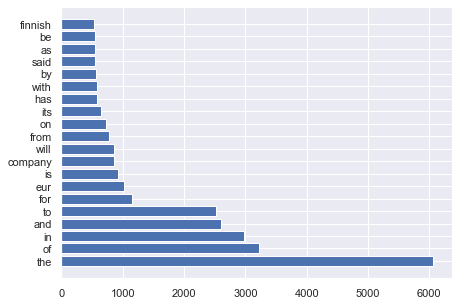

In [17]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_without_clean))

plt.show()

In [18]:
sum_words_with_clean = cv.fit_transform(new_df['clean_text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_with_clean = [(word, sum_words_with_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_with_clean = sorted(words_freq_with_clean, key = lambda x: x[1], reverse=True)[:20]

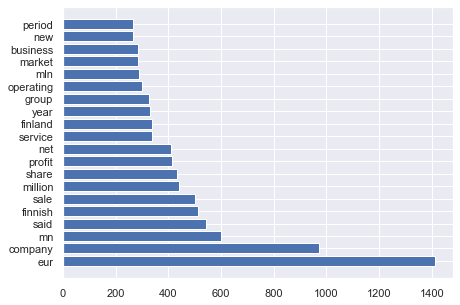

In [19]:
sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_with_clean))

plt.show()

# Nube de Palabras

In [20]:
stopwords = set(STOPWORDS)

In [21]:
text = " ".join(review for review in new_df.clean_text.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

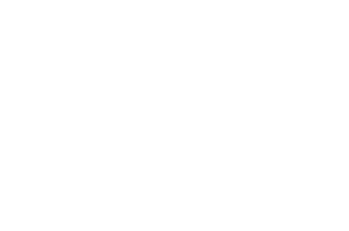

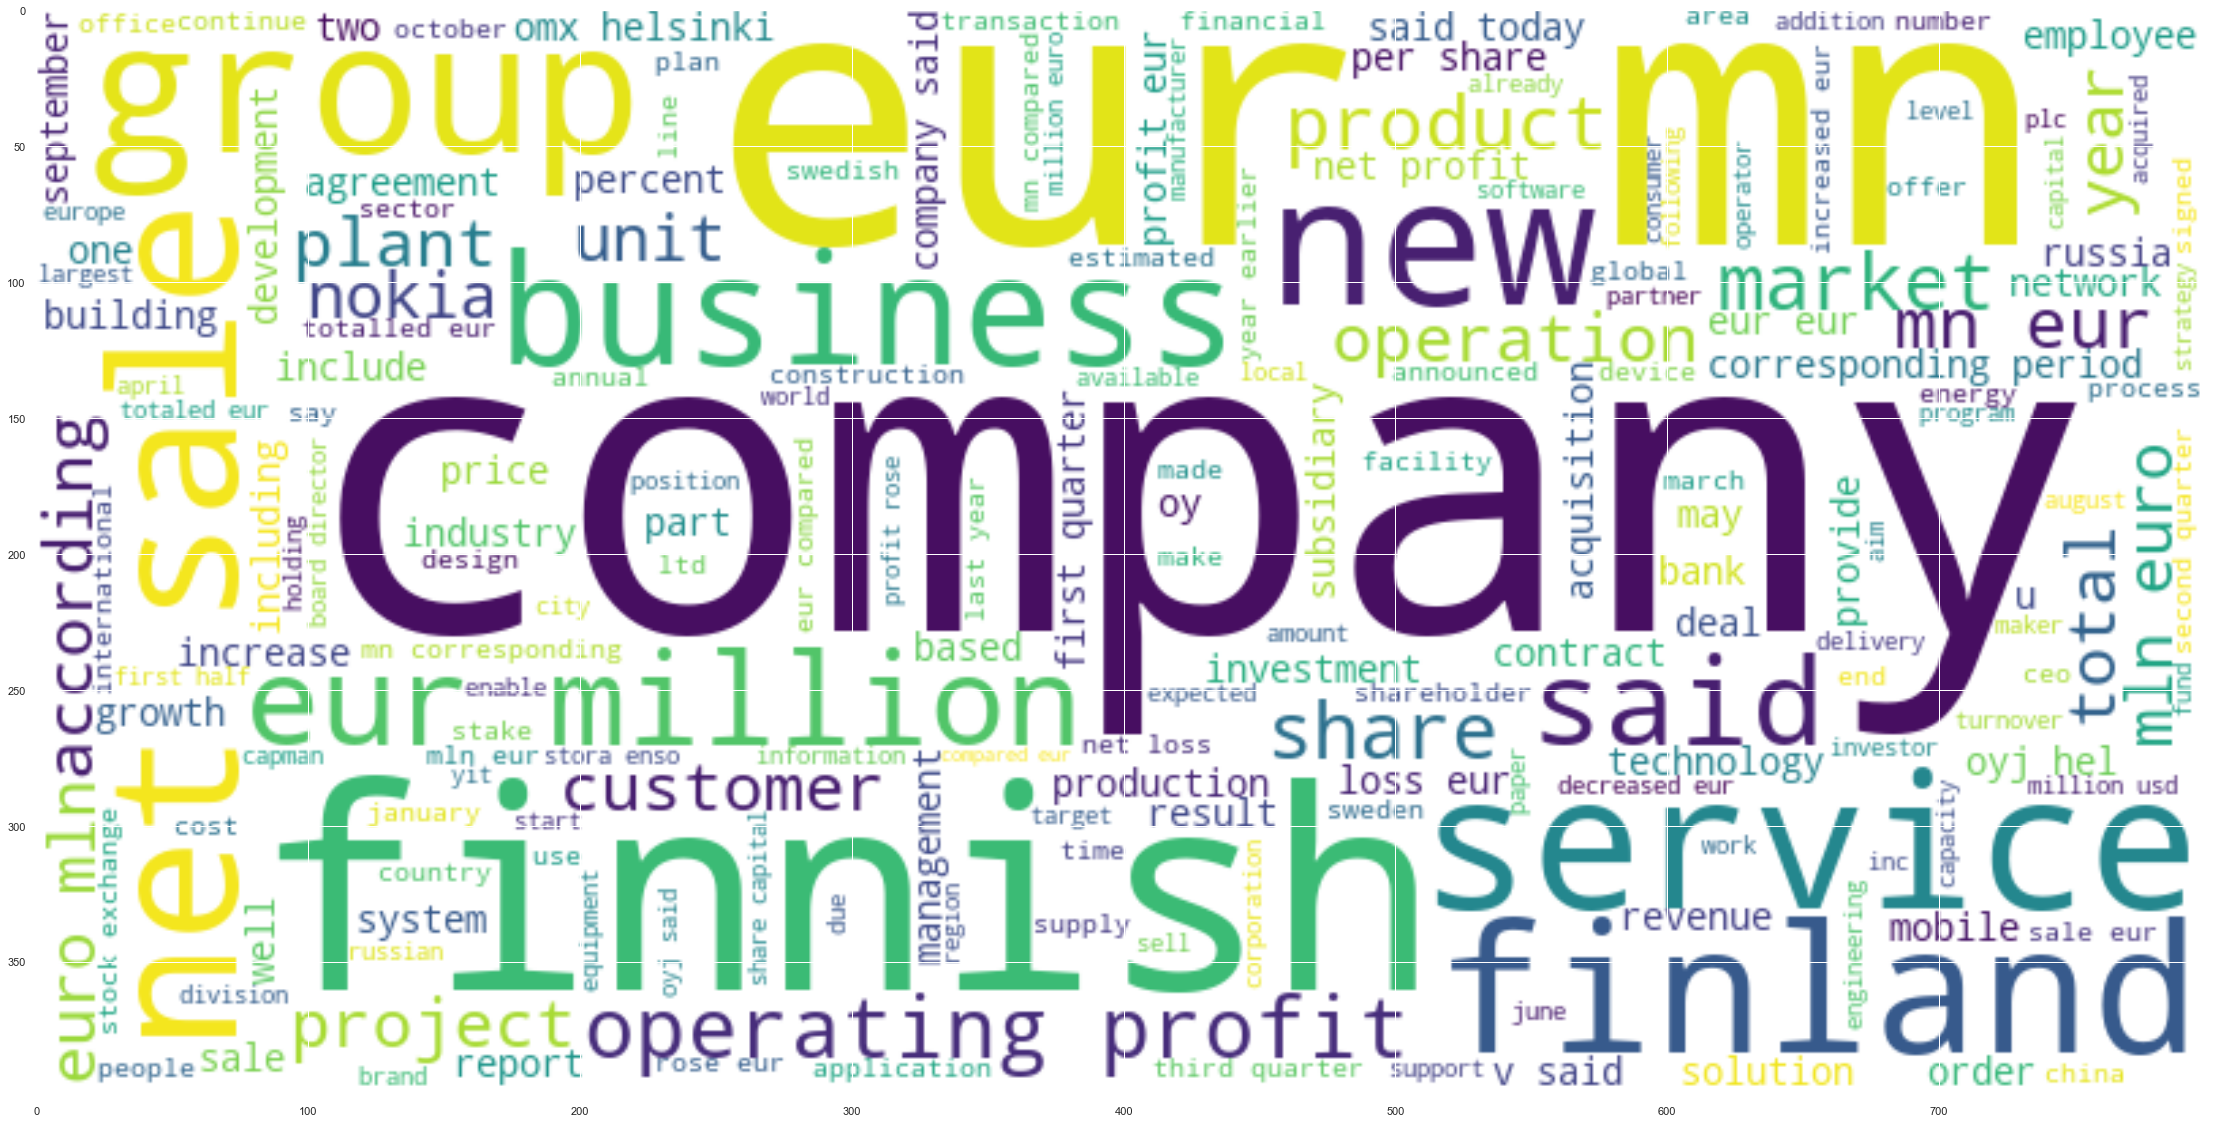

In [22]:
plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

# Nube de Palabras - Negativo

In [23]:
negative_df = new_df[new_df["target"] == -1]

negative_text = " ".join(review for review in negative_df.clean_text.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(negative_text)

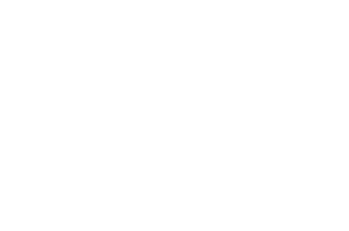

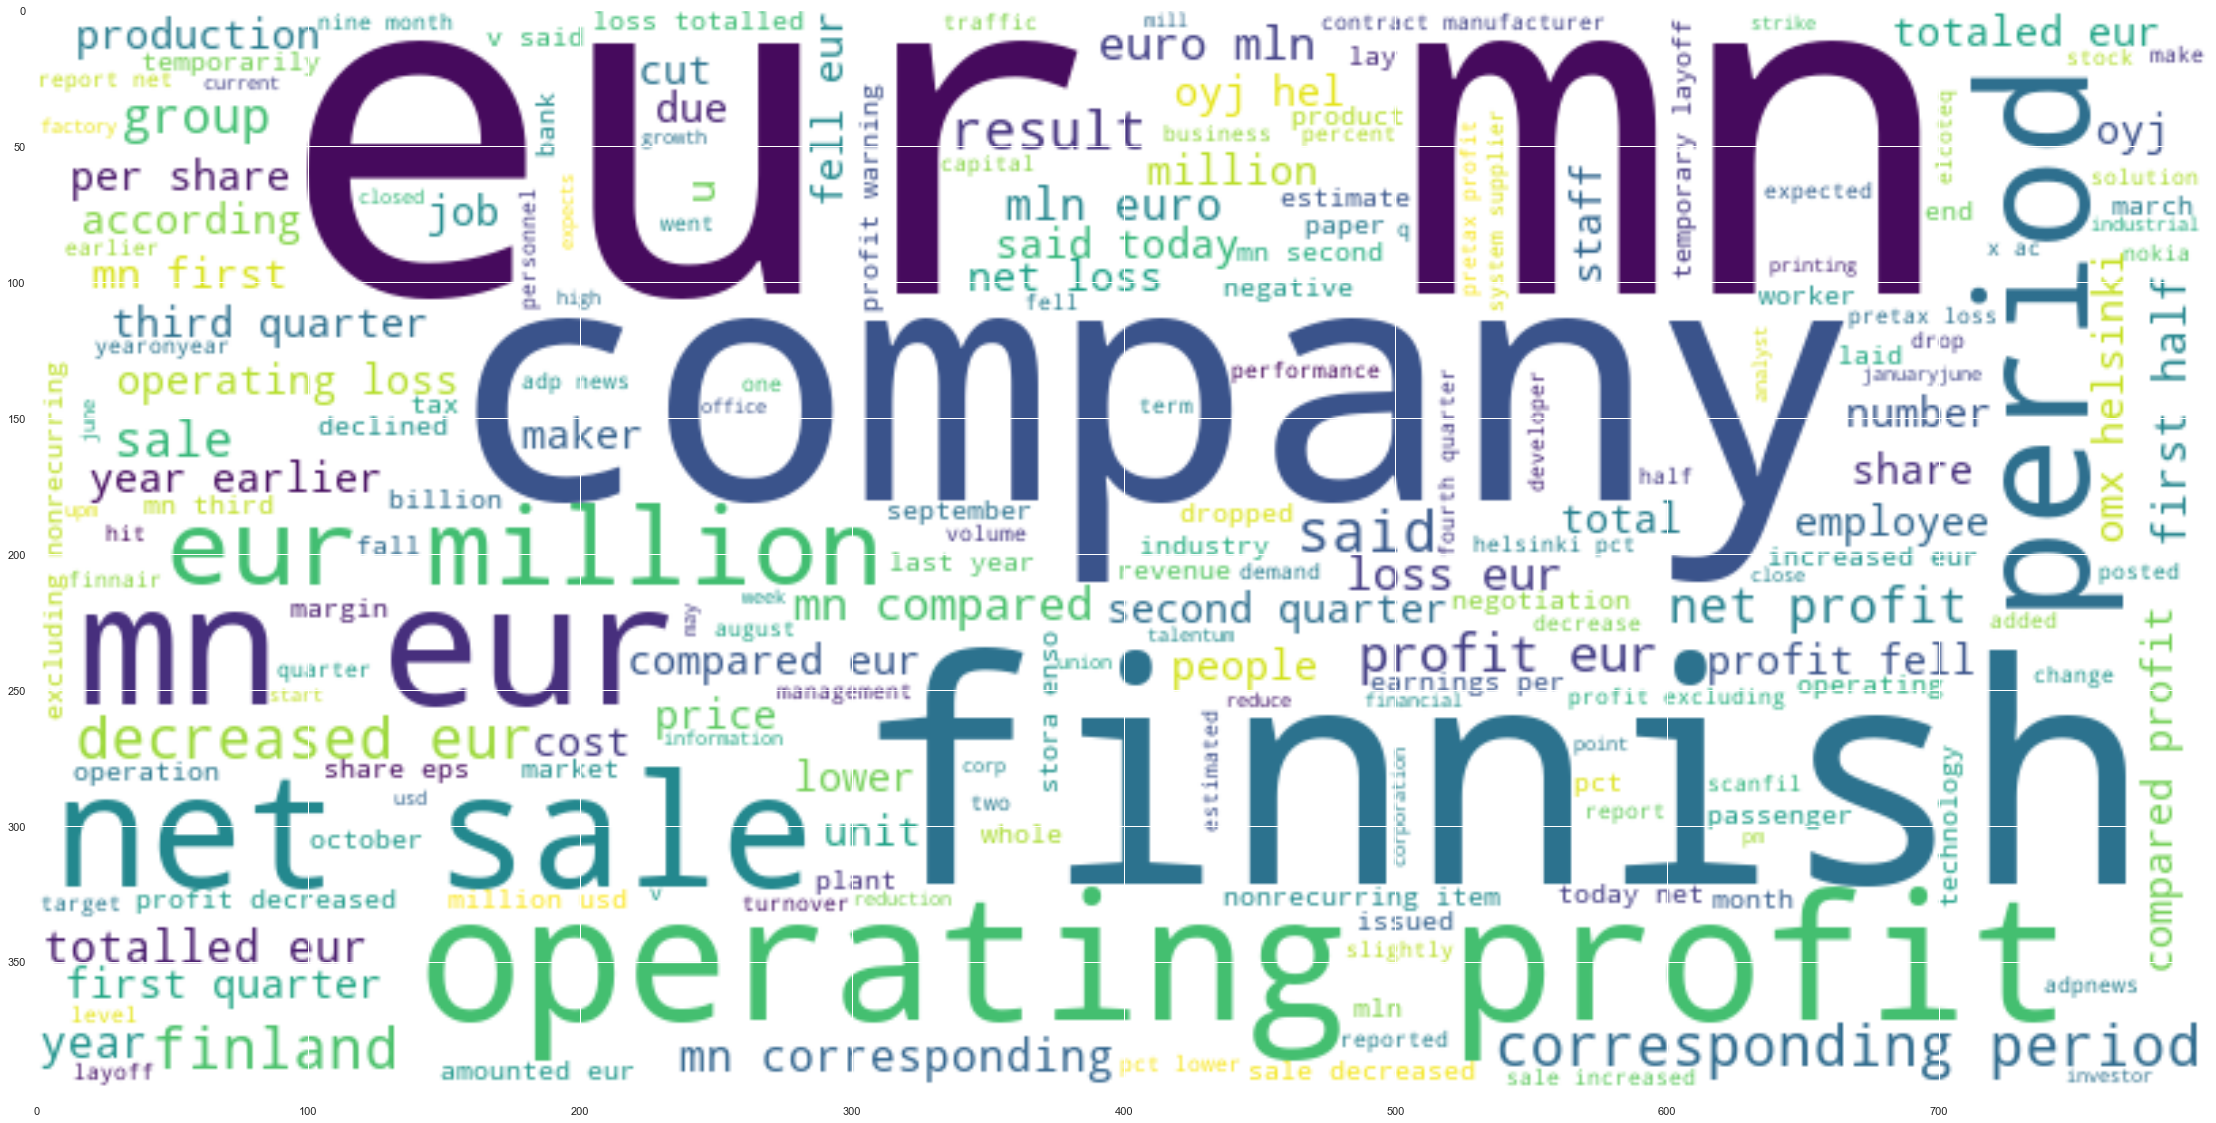

In [24]:
plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

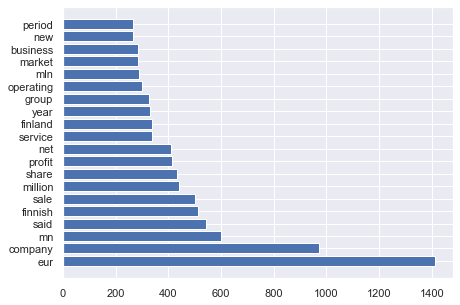

In [25]:
sum_words_neg = cv.fit_transform(new_df['clean_text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_neg = [(word, sum_words_neg[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_neg = sorted(words_freq_neg, key = lambda x: x[1], reverse=True)[:20]


sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_neg))

plt.show()

# Nube de Palabras - Neutro

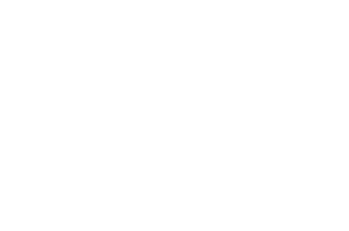

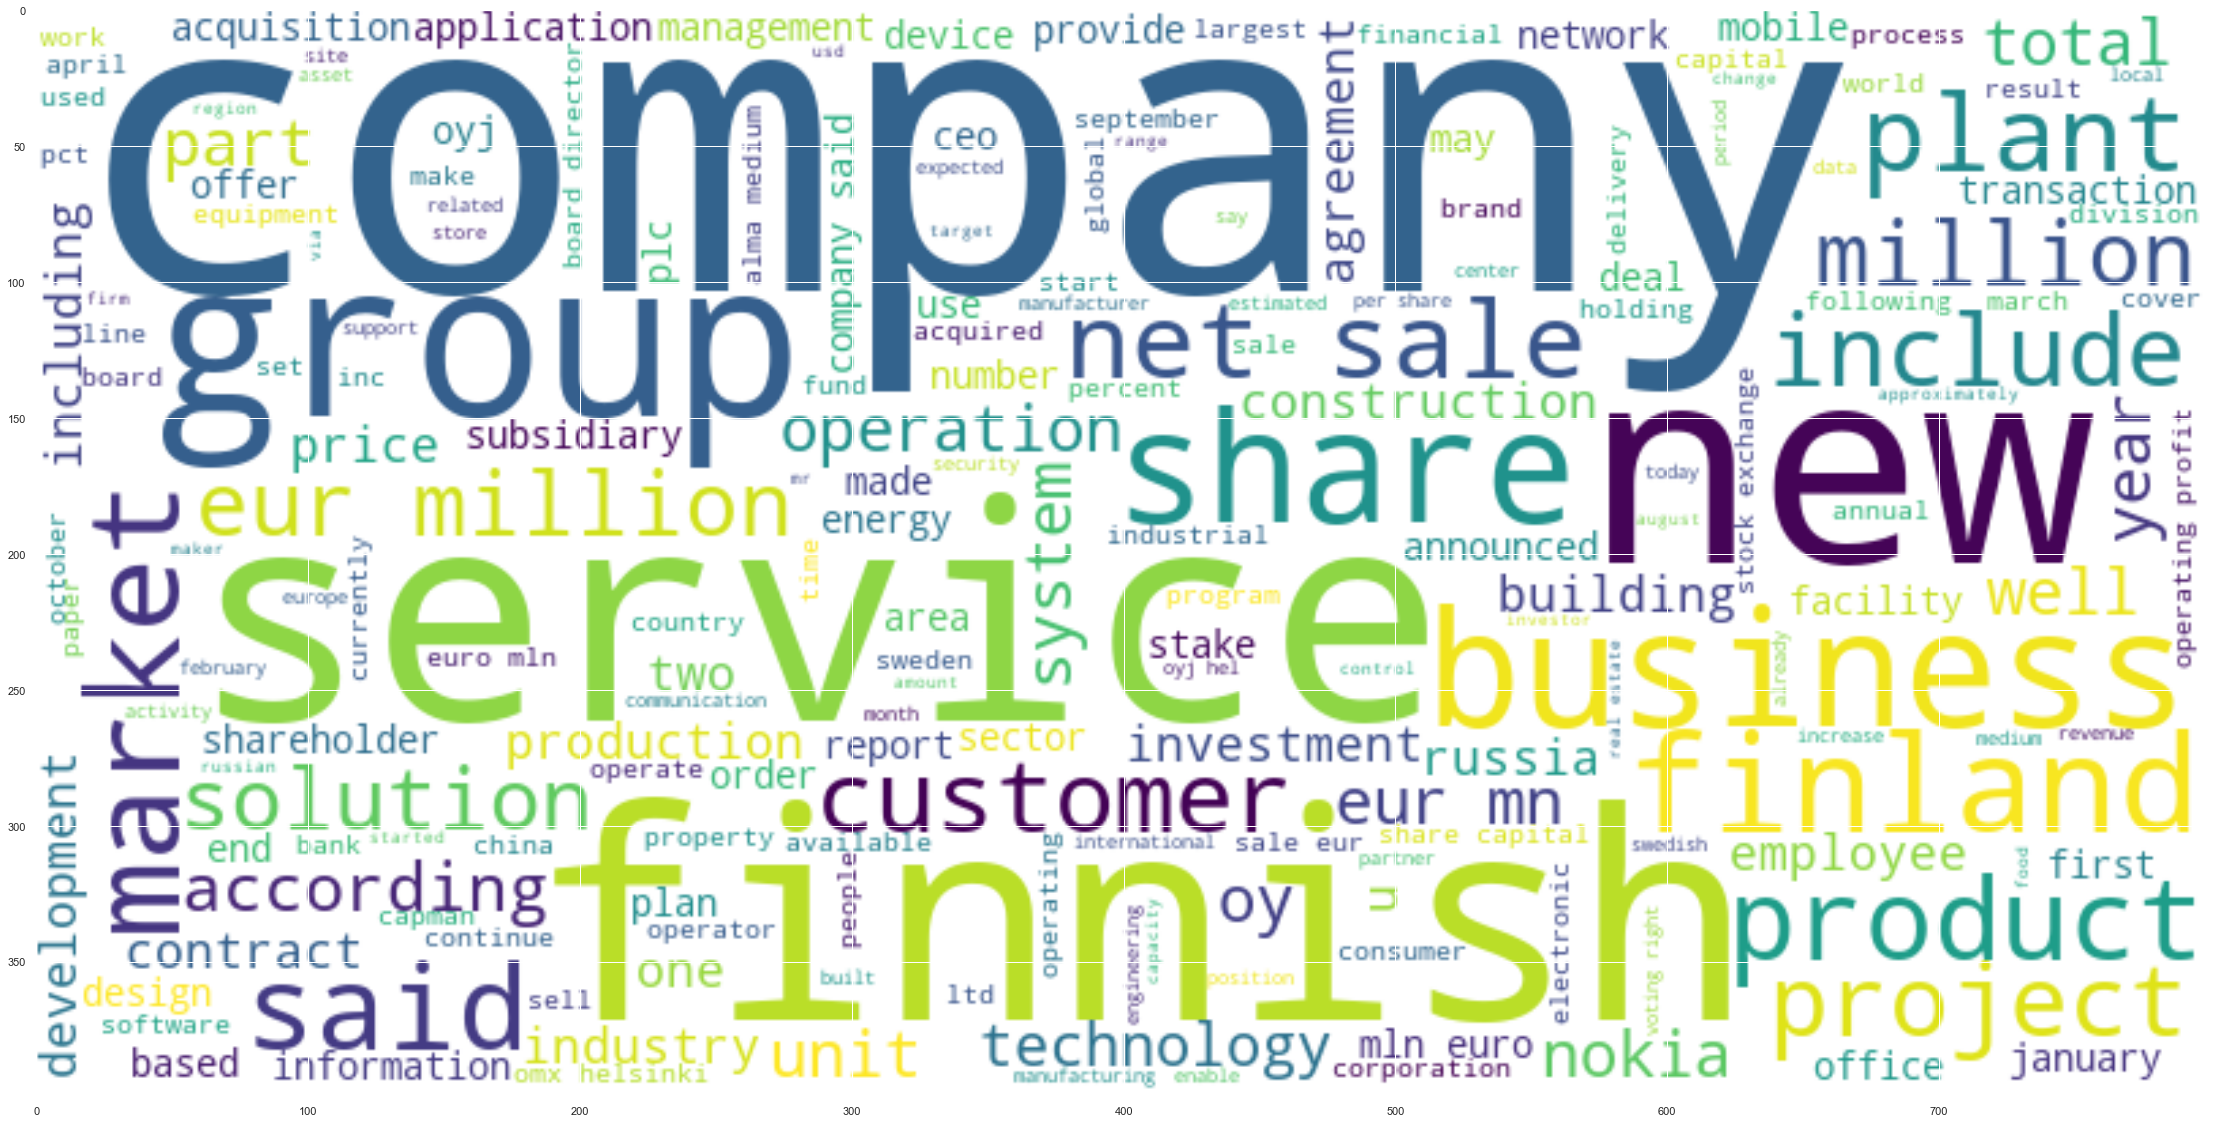

In [26]:
neutral_df = new_df[new_df["target"] == 0]

neutral_text = " ".join(review for review in neutral_df.clean_text.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(neutral_text)

plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

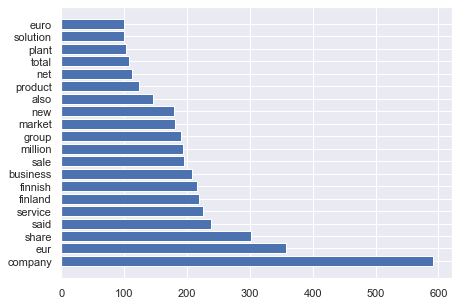

In [27]:
sum_words_neu = cv.fit_transform(neutral_df['clean_text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_neu = [(word, sum_words_neu[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_neu = sorted(words_freq_neu, key = lambda x: x[1], reverse=True)[:20]


sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_neu))

plt.show()

# Nube de Palabras - Positive

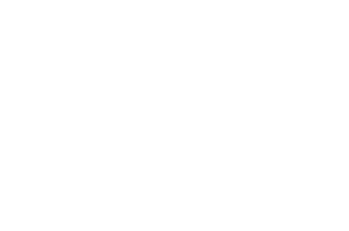

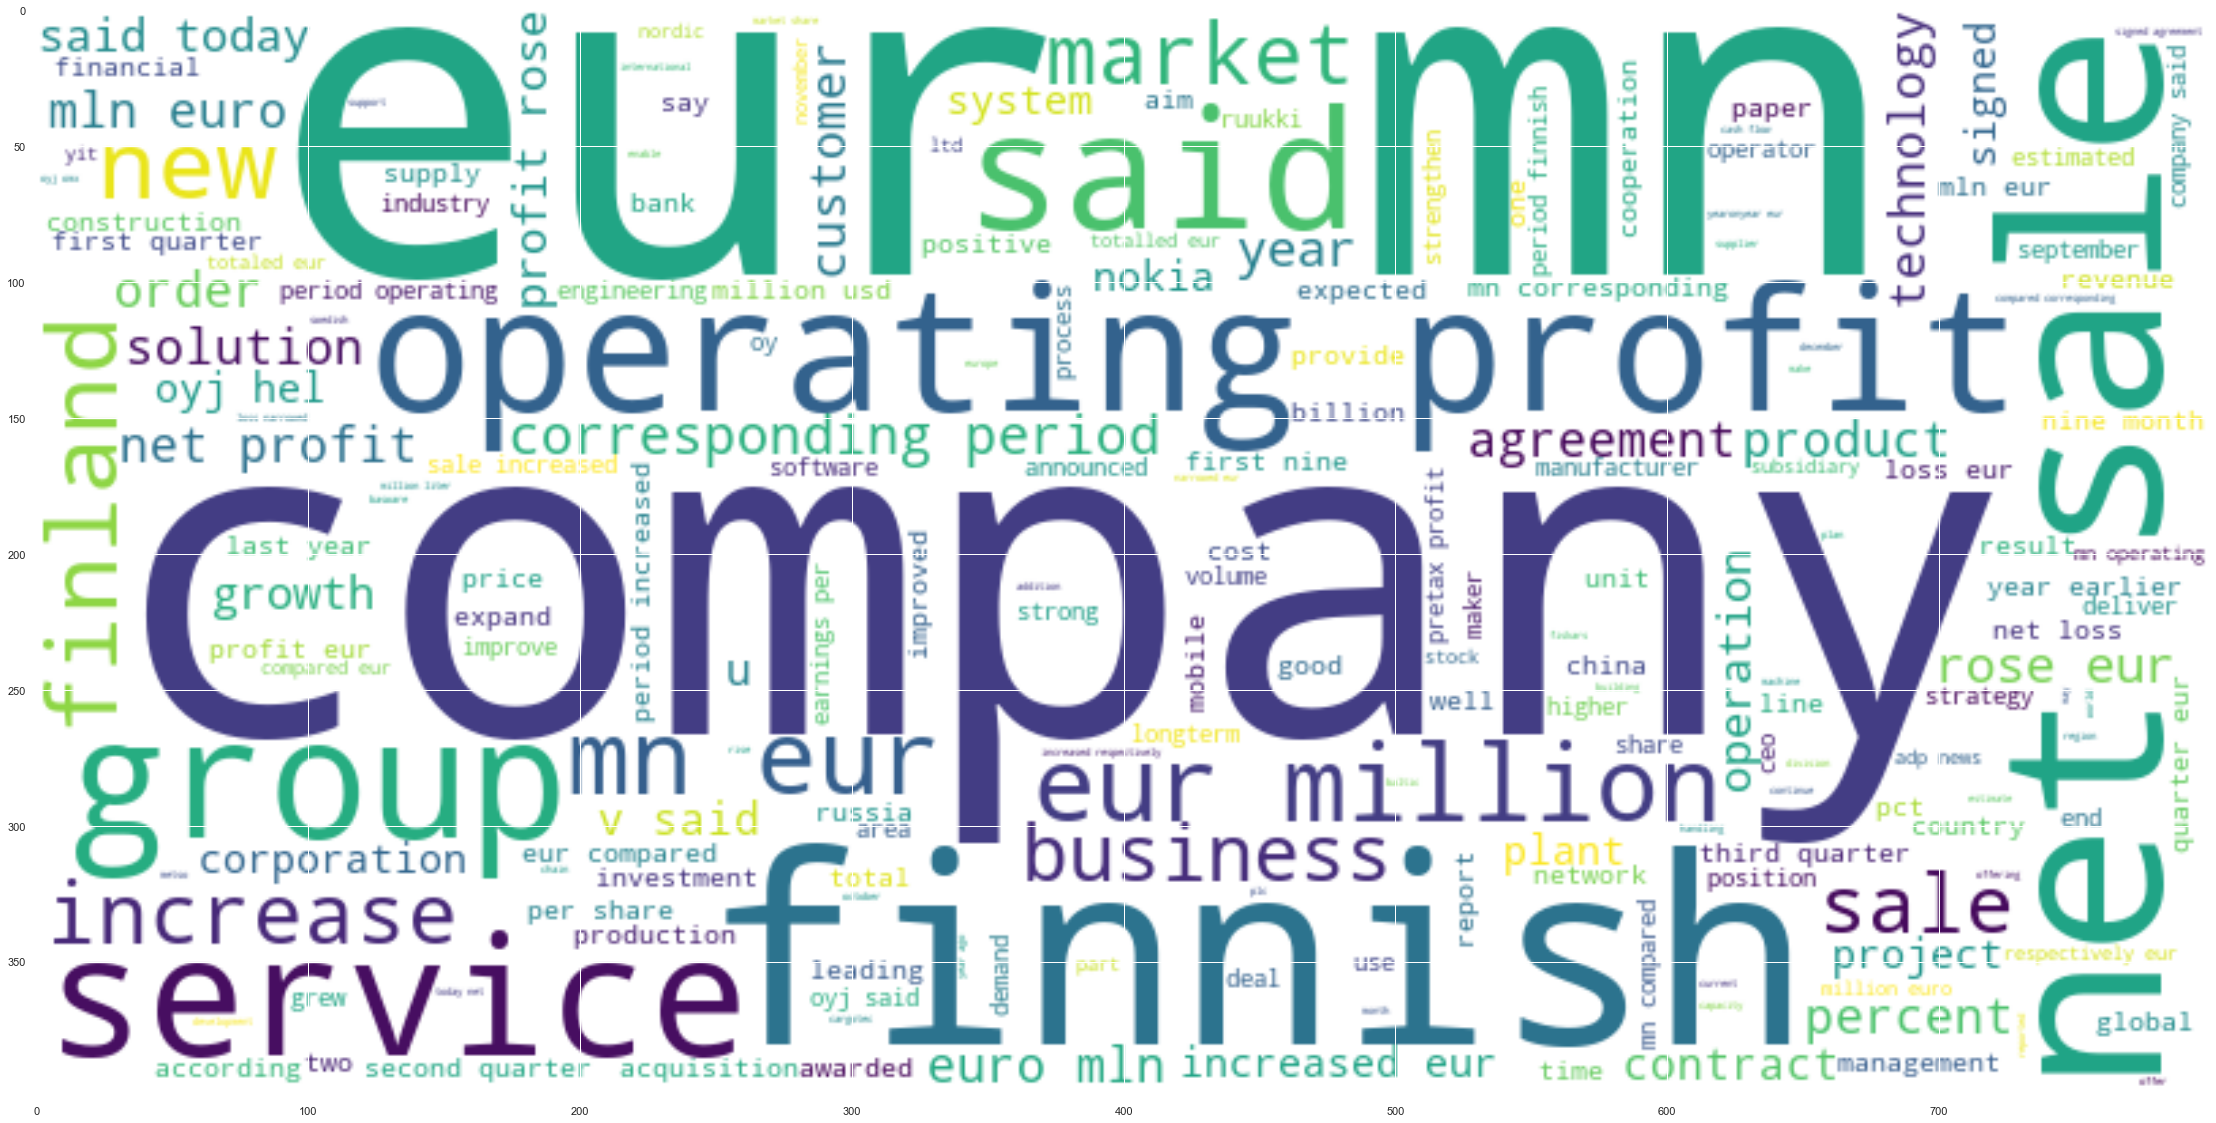

In [28]:
positive_df = new_df[new_df["target"] == 1]

positive_text = " ".join(review for review in positive_df.clean_text.astype(str))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(positive_text)

plt.axis("off")

plt.figure(figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

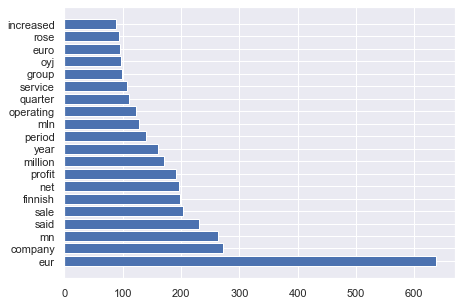

In [29]:
sum_words_pos = cv.fit_transform(positive_df['clean_text'].values.astype('U')).sum(axis=0)

# Calculamos 
words_freq_pos = [(word, sum_words_pos[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_pos = sorted(words_freq_pos, key = lambda x: x[1], reverse=True)[:20]


sns.set(font_scale=1)

plt.figure(figsize=(7, 5))
plt.barh(*zip(*words_freq_pos))

plt.show()